<a href="https://colab.research.google.com/github/SalhRosas/Pepperdine/blob/main/Section2_Async.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/bank-additional.csv'

bank = pd.read_table(url, sep=';')
bank.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4109,63,retired,married,high.school,no,no,no,cellular,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
4110,53,housemaid,divorced,basic.6y,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4111,30,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no
4112,31,technician,single,professional.course,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4113,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


## skylearn is a machine learning tool for predictive analytics
## we are creatinf two data sets  bank_train and bank_test 
# - The first input, bank, specifies that we are partitioning the bank data set, and the test_size = 0.25 input states that 25% of the bank data set should be in the test data set, whereas the remaining 75% should be in the training data set. The random_state input sets the seed for the random-number generator that will randomly split the data into training and test data sets -





In [34]:
from sklearn.model_selection import train_test_split
import random

In [35]:
bank_train, bank_test = train_test_split(bank, test_size = 0.25, random_state = 7) #25% test_data and 75% training_data partition

In [36]:
bank.shape
bank_train.shape
bank_test.shape

(1030, 21)

## How to balance the Training Data Set in Python

In [37]:
bank_train['y'].value_counts()

no     2751
yes     338
Name: y, dtype: int64

##The count of 'yes' responses will change depending on the partition. For the partition using the random seed specified in the previous Python code, there are 3089 records in the training data set, with 338 having the 'yes' response value. Thus, about 12% of the training data set has a 'yes' response value.

In [61]:
to_resample = bank_train.loc[bank_train['y'] == 'yes']
to_resample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1409,42,admin.,single,university.degree,no,yes,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,yes
1599,44,services,divorced,high.school,no,no,no,cellular,may,mon,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,yes
2616,34,admin.,single,university.degree,no,no,no,cellular,nov,thu,...,1,7,2,success,-3.4,92.649,-30.1,0.714,5017.5,yes
3097,37,admin.,married,university.degree,no,no,no,telephone,jul,mon,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
3697,38,services,single,high.school,no,no,no,cellular,sep,fri,...,2,999,0,nonexistent,-1.1,94.199,-37.5,0.878,4963.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,41,services,married,high.school,no,yes,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,yes
1175,36,blue-collar,single,basic.9y,no,yes,yes,telephone,jun,thu,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,yes
2542,41,admin.,married,basic.6y,no,no,no,cellular,apr,fri,...,2,999,1,failure,-1.8,93.075,-47.1,1.479,5099.1,yes


# the loc command subsets the bank_train data based on the condition bank_train ['y'] == "yes" and saves the resulting data set under the name to_resample. Next, we need to sample from our records of interest

In [65]:
our_resample = to_resample.sample(n=33, replace = True)

In [66]:
our_resample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
743,41,technician,married,high.school,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
743,41,technician,married,high.school,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
1687,43,technician,married,professional.course,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,93.876,-40.0,0.699,5008.7,yes
3580,26,admin.,single,university.degree,no,no,no,telephone,aug,mon,...,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
3270,44,services,divorced,high.school,no,yes,yes,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,yes
1932,39,unemployed,single,university.degree,no,yes,no,cellular,dec,mon,...,1,6,2,success,-3.0,92.713,-33.0,0.706,5023.5,yes
2966,47,admin.,single,university.degree,no,no,no,cellular,oct,mon,...,3,999,0,nonexistent,-1.1,94.601,-49.5,1.000,4963.6,yes
1813,31,self-employed,single,university.degree,no,no,no,cellular,dec,wed,...,1,999,0,nonexistent,-3.0,92.713,-33.0,0.715,5023.5,yes
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
3354,52,admin.,married,university.degree,no,no,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,93.876,-40.0,0.677,5008.7,yes


The sample() command draws records at random from to_resample, which holds the records we want to resample. The input n=841 specifies how many records to draw, while the input replace = True specifies the sample w/ replacement. The output is a data set made up of these 841 randomly resampled records, which we save under the name re_sample. Finally we add the resampled records to our original training data set. 

In [67]:
bank_train_rebal = pd.concat([bank_train, our_resample])
bank_train_rebal

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
751,38,management,married,university.degree,no,no,yes,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2422,32,admin.,married,university.degree,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
488,40,admin.,married,university.degree,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
2021,55,admin.,divorced,university.degree,no,yes,no,telephone,may,thu,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1268,51,entrepreneur,married,university.degree,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,45,admin.,single,university.degree,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
1004,25,blue-collar,single,high.school,no,no,no,cellular,may,fri,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,yes
3165,26,management,single,university.degree,no,no,no,cellular,mar,thu,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,yes
2862,58,management,married,university.degree,no,no,no,cellular,may,thu,...,1,3,4,success,-1.8,93.876,-40.0,0.683,5008.7,yes


In [68]:
bank_train_rebal['y'].value_counts() #12% = Yes

no     2751
yes     371
Name: y, dtype: int64

#Multicollinearity

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']

data = pd.read_csv(url, names = col)

data.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#So another thing that we do in model preparation is we look at the multicollinearity. And one good approach to doing that is to draw a pair plot. A pair plot basically plots a scatter plot of two attributes that are not the same and a histogram of the data on itself

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


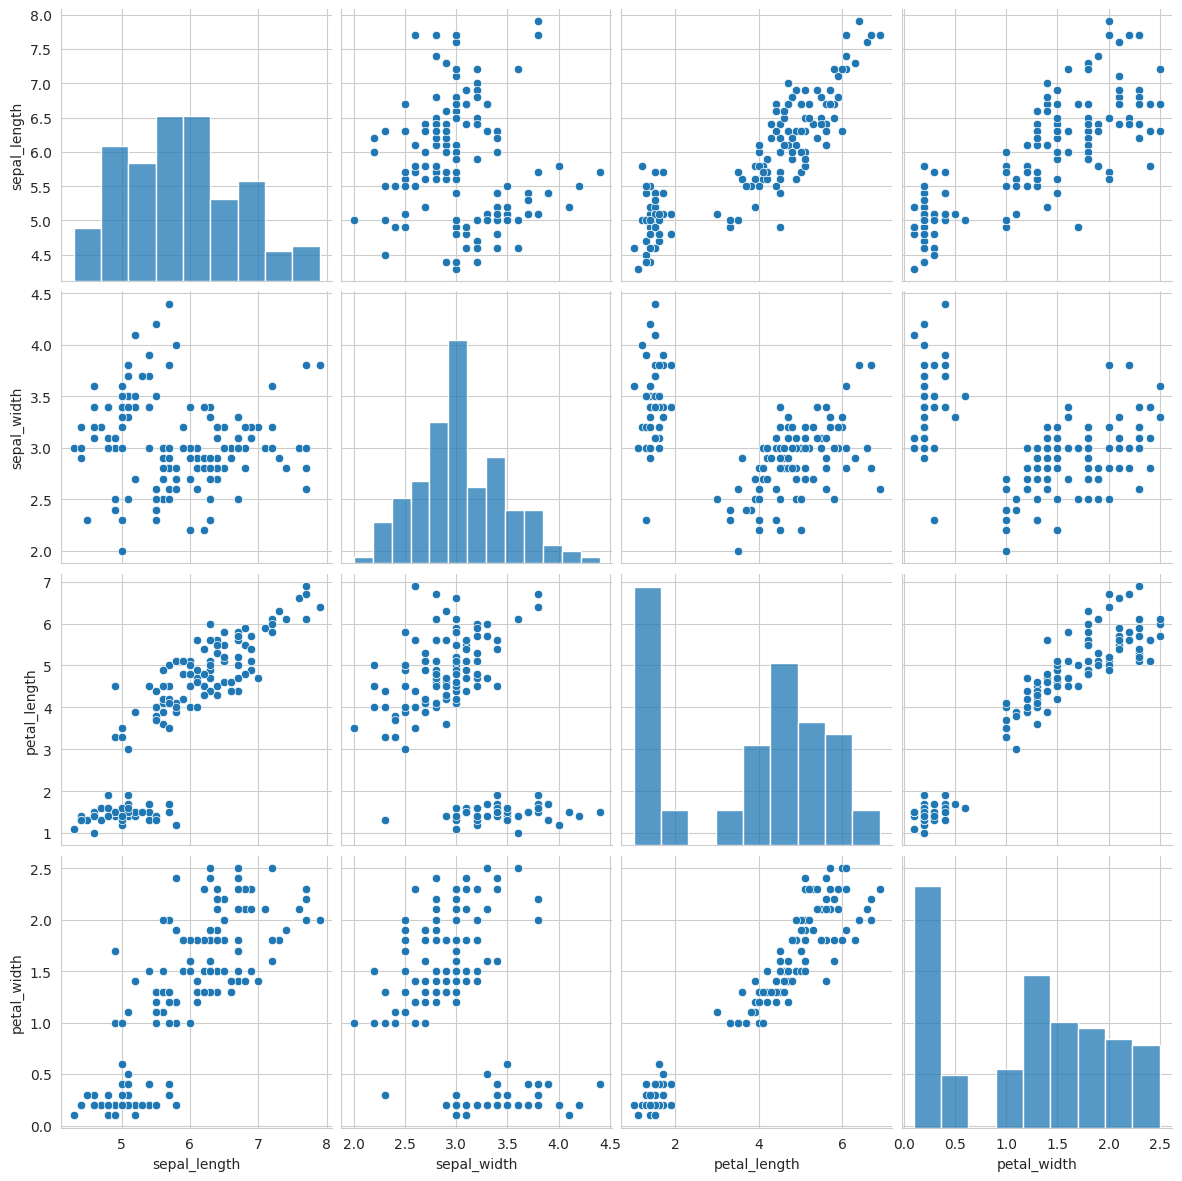

In [42]:
sns.set_style('whitegrid')
sns.pairplot(data, size=3)
plt.show()

<ipython-input-43-92c7d8511b5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().round(2)


<Axes: >

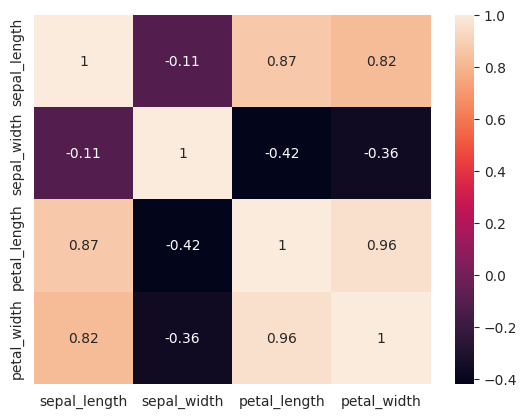

In [43]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [44]:
#import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test = train_test_split(data, test_size=0.1) ### 90% training and 10% test#

Text(0, 0.5, 'sepal_width')

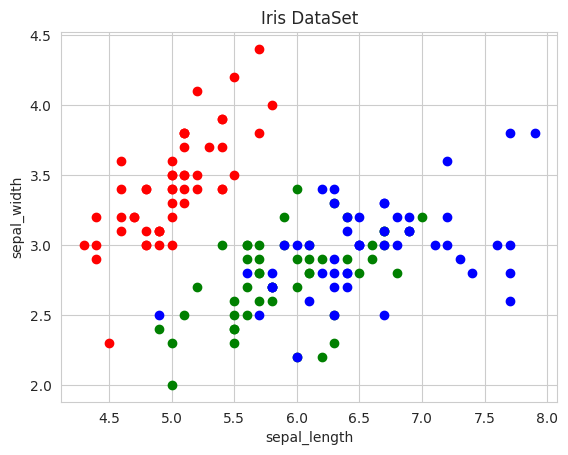

In [45]:
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
# creat a figure and axis
fig, ax = plt.subplots()
#plot each data-point
for i in range(len(data['sepal_length'])):
  ax.scatter(data['sepal_length'][i], data['sepal_width'][i], color=colors[data['type'][i]])
# set a title and lables
ax.set_title("Iris DataSet")
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')


In [46]:
from sklearn.cluster import KMeans

iris2 = data.drop(['type'], axis = 1)
x= iris2.copy()

kmeans = KMeans(3)

kmeans.fit(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
KMeans(algorithm='auto', copy_x= True, init= 'k-means++', max_iter= 300,
       n_clusters= 3, n_init= 10,
       random_state =None, tol= 0.0001, verbose= 0)

KMeans(algorithm='auto', n_clusters=3, n_init=10)

In [48]:
iris3 = data
iris3['predict'] = kmeans.fit_predict(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


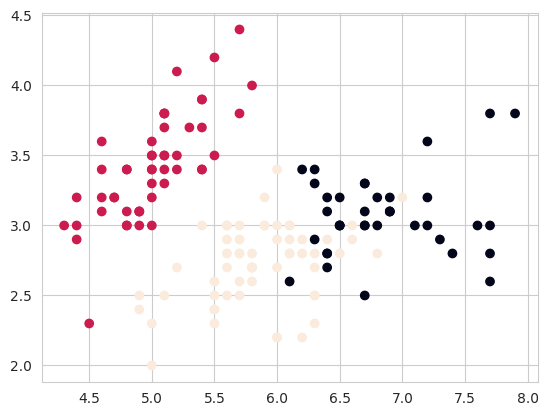

In [50]:
import matplotlib.pyplot as plt
plt.scatter(iris3['sepal_length'], iris3['sepal_width'], c=iris3['predict'])